In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_size, hidden_size, output_size = 2, 30, 1
learning_rate = 0.01
np.random.rand(0)
W1 = np.random.randn(input_size, hidden_size)  / np.sqrt(input_size) * np.sqrt(2)
W2 = np.random.randn(hidden_size, output_size)  / np.sqrt(hidden_size) * np.sqrt(2)
epoch = 1000
N = 100

In [3]:
def forward(V):
    global W1
    global W2
    H = np.tanh(np.dot(V, W1))
    U = np.dot(H, W2)
    return U, H

def backward(V, H, U, D):
    global W1
    global W2
    error_output = U - D # 出力層の誤差
    error_hidden = (1 - H * H) * np.dot(W2, error_output) # 隠れ層の誤差 # 隠れ層が複数ノードだったらaxis=1
    W1 -= np.dot(V.reshape(len(V), 1), error_hidden.reshape(1, len(error_hidden))) * learning_rate
    W2 -= np.dot(H.reshape(len(H), 1), error_output.reshape(1, len(error_output))) * learning_rate

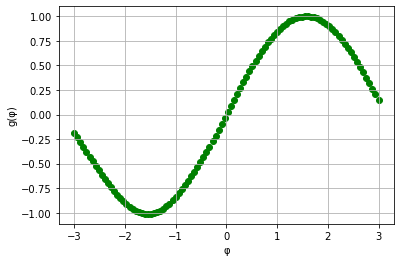

In [4]:
Vs = np.linspace(-3, 3, N)
np.random.shuffle(Vs)

for loop in range(epoch):
    for V in Vs:
        V = np.array([V])
        D = np.sin(V)      
        V = np.insert(V, 0, 1)
        U, H =forward(V)
        backward(V, H, U, D)

Us = []
for V in Vs:
    V = np.array([V])
    V = np.insert(V, 0, 1)
    U, H =forward(V)
    Us.append(U)

fig = plt.figure()
plt.scatter(Vs, Us, color="g")
plt.xlabel("φ")
plt.ylabel("g(φ)")
plt.grid()
plt.show()
fig.savefig("tanh_sin.png")

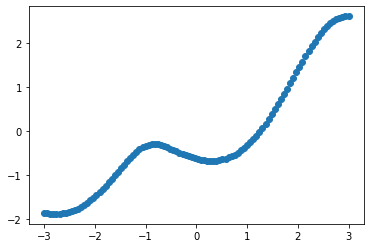

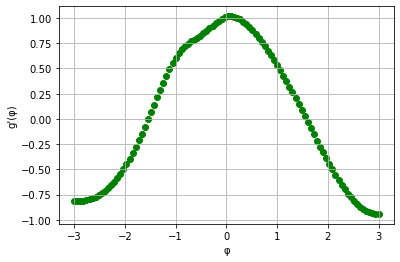

In [5]:
U_dashs1 = []
U_dashs2 = []
for V in Vs:
    V = np.array([V])
    V = np.insert(V, 0, 1)
    H = np.tanh(np.dot(V, W1))
    tanh_dash = (1 - H * H)
    U_dash = np.dot(tanh_dash * W1, W2)
    U_dashs1.append(U_dash[0, 0])
    U_dashs2.append(U_dash[1, 0])
    
plt.scatter(Vs, U_dashs1)
plt.show()

fig = plt.figure()
plt.scatter(Vs, U_dashs2, color="g")
plt.xlabel("φ")
plt.ylabel("g'(φ)")
plt.grid()
plt.show()
fig.savefig("tanh_cos.png")